#Data Pre-Processing

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

In [297]:
dataset = pd.read_csv('dataset.csv')

In [298]:
dataset.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [299]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [300]:
dataset.duplicated().sum()

0

In [301]:
num = dataset.select_dtypes(include=['int64','float64']).columns
cat = dataset.select_dtypes(include=['object']).columns

In [302]:
dataset[num].describe().T

,count,mean,std,min,25%,50%,75%,max
EnterpriseID,287.0,105923.324042,4044.977599,100282.0,101269.0,106069.0,110514.5,111703.0
SkorSurveyEngagement,287.0,3.101045,0.836388,1.0,3.0,3.0,4.0,5.0
SkorKepuasanPegawai,282.0,3.904255,0.913355,1.0,3.0,4.0,5.0,5.0
JumlahKeikutsertaanProjek,284.0,1.179577,2.294441,0.0,0.0,0.0,0.0,8.0
JumlahKeterlambatanSebulanTerakhir,286.0,0.412587,1.275016,0.0,0.0,0.0,0.0,6.0
JumlahKetidakhadiran,281.0,10.448399,6.902252,1.0,5.0,10.0,15.0,55.0
IkutProgramLOP,29.0,0.517241,0.508548,0.0,0.0,1.0,1.0,1.0


In [303]:
dataset[cat].describe().T

,count,unique,top,freq
Username,287,285,boredEggs0,2
StatusPernikahan,287,5,Belum_menikah,132
JenisKelamin,287,2,Wanita,167
StatusKepegawaian,287,3,FullTime,217
Pekerjaan,287,14,Software Engineer (Back End),109
JenjangKarir,287,3,Freshgraduate_program,169
PerformancePegawai,287,5,Biasa,85
AsalDaerah,287,5,Jakarta Pusat,72
HiringPlatform,287,9,Indeed,85
NomorHP,287,287,+6282232522xxx,1


In [304]:
dataset.nunique()

,0
Username,285
EnterpriseID,287
StatusPernikahan,5
JenisKelamin,2
StatusKepegawaian,3
Pekerjaan,14
JenjangKarir,3
PerformancePegawai,5
AsalDaerah,5
HiringPlatform,9


In [305]:
# Melihat unique value dari setiap kolom
for column_name in dataset.columns:
    unique_values = dataset[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}' {dataset[column_name].dtype}:\n == {unique_values_str} == \n")

Unique values in 'Username' object:
 == spiritedPorpoise3, jealousGelding2, pluckyMuesli3, stressedTruffle1, shyTermite7, emptyMacaw4, madZebra1, cynicalMandrill7, lyingMussel8, enviousMoth4, puzzledCake4, grizzledSnipe7, yearningBagels0, sheepishSheep9, madWildfowl7, enviousSalami4, pacifiedRaisins7, wrathfulMagpie6, hushedSeahorse7, guiltyMoth4, peacefulCoati5, dejectedPolenta7, needfulLeopard2, offendedIguana0, pluckyHoopoe3, needySyrup4, forsakenOwl1, pluckyApples4, guiltySnail8, grizzledFlamingo9, worriedSyrup7, somberBoars0, giddyMallard9, madFerret4, mereCaribou1, decimalAbalone6, blissfulMussel3, ardentLapwing0, peskyTeal7, blissfulHyena1, solidMacaw1, cautiousPolenta9, excludedPorpoise4, shamefulIguana0, shySyrup7, forsakenCow7, grumpyFish4, wingedPorpoise5, soreCaribou0, needfulCardinal0, giddyCheetah9, hushedOil9, crummyPudding5, selfishBasmati2, adoringCardinal9, importedApricots7, grizzledCod7, insecureShads2, wornoutChamois3, lazyToucan3, cockyTeal5, puzzledBagels7, debon

In [306]:
dataset.isnull().sum().sort_values(ascending=False)

,0
IkutProgramLOP,258
AlasanResign,66
JumlahKetidakhadiran,6
SkorKepuasanPegawai,5
JumlahKeikutsertaanProjek,3
JumlahKeterlambatanSebulanTerakhir,1
TanggalPenilaianKaryawan,0
TanggalHiring,0
TanggalLahir,0
PernahBekerja,0


* **ikutprogramLOP**:

  * Step: Menghapus kolom dalam dataframe.
  * Reason: Kolom ini memiliki missing value yang sangat banyak (258), dan tidak terlalu berpengaruh pada analisis sehingga menghapusnya tidak akan mempengaruhi nilai penting dalam data.

* **AlasanResign**:

  * Step: Mengisi missing value dengan "Lainnya", menunjukkan bahwa alasan resign tidak diketahui atau tidak termasuk dalam data yang telah ditetapkan.
  * Reason: Mengisi missing values dengan "Lainnya", membantu mempertahankan data asli dari alasan yang tidak diketahui.

* **Jumlahketidakhadiran**:

  * Step: Mengisi missing value dengan nilai median.
  * Reason: Penggunaan nilai median membantu menghindari pengaruh nilai outlier atau nilai ekstrem saat mengisi nilai yang hilang.

* **skorkepuasanpengawai**:

  * Step: Mengisi missing value dengan nilai median.
  * Reason: Penggunaan nilai median membantu menghindari pengaruh nilai outlier atau nilai ekstrem saat mengisi nilai yang hilang.

* **jumlahkeikutsertaanprojek**:

  * Step: Mengisi missing value dengan nilai median.
  * Reason: Penggunaan nilai median membantu menghindari pengaruh nilai outlier atau nilai ekstrem saat mengisi nilai yang hilang.

* **Jumlahketerlambatansebulanterakhir**:

  * Step: Mengisi missing value dengan nilai median.
  * Reason: Penggunaan nilai median membantu menghindari pengaruh nilai outlier atau nilai ekstrem saat mengisi nilai yang hilang.








In [307]:
# Menghapus IkutProgramLOP karena terlalu banyak missing values
dataset.drop('IkutProgramLOP', axis=1, inplace=True)

#Mengisi Missing Value
dataset['SkorKepuasanPegawai'] = dataset['SkorKepuasanPegawai'].fillna(dataset['SkorKepuasanPegawai'].median())
dataset['JumlahKeikutsertaanProjek'] = dataset['JumlahKeikutsertaanProjek'].fillna(dataset['JumlahKeikutsertaanProjek'].median())
dataset['JumlahKeterlambatanSebulanTerakhir'] = dataset['JumlahKeterlambatanSebulanTerakhir'].fillna(dataset['JumlahKeterlambatanSebulanTerakhir'].median())
dataset['JumlahKetidakhadiran'] = dataset['JumlahKetidakhadiran'].fillna(dataset['JumlahKetidakhadiran'].median())
dataset['AlasanResign'] = dataset['AlasanResign'].fillna('Lainnya')

In [308]:
# Mengganti ketidakkonsistenan data pada kolom PernahBekerja
dataset['PernahBekerja'].replace(['yes'], 1, inplace=True)
dataset['PernahBekerja'] = dataset['PernahBekerja'].astype(int)

# Mengganti data yang tidak sesuai pada kolom AlasanResign
dataset['AlasanResign'].replace(['Product Design (UI & UX)'], dataset['AlasanResign'].mode()[0], inplace=True)

In [309]:
df_clean = dataset.copy()

# Menghutung Jumlah Karyawan yang Masuk Dan Resign

In [310]:
#Mengubah 'TanggalHiring' dan 'TanggalResign' menjadi datetime
df_clean['TanggalHiring'] = pd.to_datetime(df_clean['TanggalHiring'])
df_clean['TanggalResign'] = pd.to_datetime(df_clean['TanggalResign'], errors='coerce')

# Ekstrak tahun pada 'TahunHiring' dan 'TahunResign'
df_clean['TahunHiring'] = df_clean['TanggalHiring'].dt.year
df_clean['TahunResign'] = df_clean['TanggalResign'].dt.year


In [311]:
# Membuat kolom 'LamaBekerja'
df_clean['LamaBekerja'] = (df_clean['TanggalResign'] - df_clean['TanggalHiring']).dt.days
df_clean['LamaBekerja'] = df_clean['LamaBekerja'] // 365  # Convert hari ke tanggal
df_clean['LamaBekerja'] = df_clean['LamaBekerja'].fillna(0).astype(int)

# Membuat kolom 'Usia'
if 'TanggalLahir' in df_clean.columns:
    df_clean['TanggalLahir'] = pd.to_datetime(df_clean['TanggalLahir'], errors='coerce')
    df_clean['UsiaHired'] = (df_clean['TanggalHiring'] - df_clean['TanggalLahir']).dt.days // 365
else:
    print("Error: 'TanggalLahir' tidak ditemukan dalam DataFrame.")

In [312]:
# Menghitung jumlah karyawan masuk setiap tahunnya
hiring_table = df_clean.groupby('TahunHiring')['TahunHiring'].count().reset_index(name='JumlahKaryawanMasuk')

# Menghitung karyawan keluar setiap tahunnya
resign_table = df_clean.groupby('TahunResign')['TahunResign'].count().reset_index(name='JumlahKaryawanKeluar')

print("Tabel Agregat Jumlah Karyawan Masuk per Tahun:")
print(hiring_table)
print("\nTabel Agregat Jumlah Karyawan Keluar per Tahun:")
print(resign_table)

Tabel Agregat Jumlah Karyawan Masuk per Tahun:
    TahunHiring  JumlahKaryawanMasuk
0          2006                    1
1          2007                    2
2          2008                    2
3          2009                    7
4          2010                    8
5          2011                   76
6          2012                   41
7          2013                   43
8          2014                   56
9          2015                   31
10         2016                   14
11         2017                    5
12         2018                    1

Tabel Agregat Jumlah Karyawan Keluar per Tahun:
   TahunResign  JumlahKaryawanKeluar
0       2013.0                     5
1       2014.0                    12
2       2015.0                     8
3       2016.0                     8
4       2017.0                    19
5       2018.0                    26
6       2019.0                     5
7       2020.0                     6


In [313]:
# Ubah nama kolom 'TahunResign' menjadi 'TahunHiring' pada resign_table
resign_table = resign_table.rename(columns={'TahunResign': 'TahunHiring'})

# Gabungkan hiring_table dan resign_table
merged_table = pd.merge(hiring_table, resign_table, on='TahunHiring', how='outer')

# Menginsi kolom kosong dengan 0 (tidak ada hiring / resign)
merged_table.fillna(0, inplace=True)

merged_table = merged_table.rename(columns={'TahunHiring' : 'Tahun'})
merged_table = merged_table.astype(int)

print("\nTabel Gabungan Jumlah Karyawan Masuk dan Keluar per Tahun:")
merged_table


Tabel Gabungan Jumlah Karyawan Masuk dan Keluar per Tahun:


,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar
0,2006,1,0
1,2007,2,0
2,2008,2,0
3,2009,7,0
4,2010,8,0
5,2011,76,0
6,2012,41,0
7,2013,43,5
8,2014,56,12
9,2015,31,8


In [314]:
# Menghitung total karyawan setiap tahunnya
merged_table['TotalKaryawan'] = merged_table['JumlahKaryawanMasuk'].cumsum() - merged_table['JumlahKaryawanKeluar'].cumsum()

print("\nTabel Total Karyawan Setiap Tahun:")
merged_table


Tabel Total Karyawan Setiap Tahun:


,Tahun,JumlahKaryawanMasuk,JumlahKaryawanKeluar,TotalKaryawan
0,2006,1,0,1
1,2007,2,0,3
2,2008,2,0,5
3,2009,7,0,12
4,2010,8,0,20
5,2011,76,0,96
6,2012,41,0,137
7,2013,43,5,175
8,2014,56,12,219
9,2015,31,8,242


## Grafik Perubahan Jumlah Karyawan

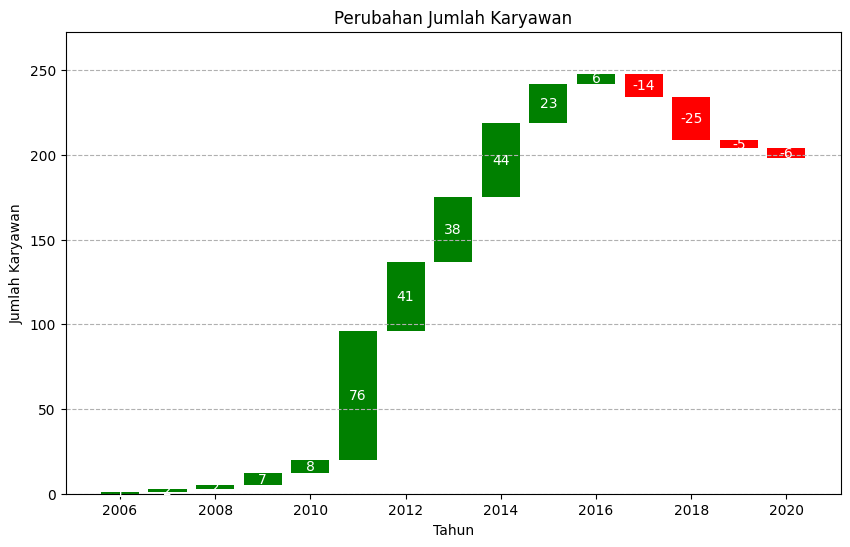

In [315]:
fig, ax = plt.subplots(figsize=(10, 6))

changes = merged_table['TotalKaryawan'].diff().fillna(merged_table['TotalKaryawan'][0])

bottom = 0
for i, (year, change) in enumerate(zip(merged_table['Tahun'], changes)):
    if change >= 0:
        ax.bar(year, change, bottom=bottom, color='green')
    else:
        ax.bar(year, change, bottom=bottom, color='red')
    bottom += change

    ax.text(year, bottom - change / 2, f"{int(change)}", ha='center', va='center', color='white', fontsize=10)

ax.set_ylim(0, merged_table['TotalKaryawan'].max() * 1.1)

ax.set_title('Perubahan Jumlah Karyawan')
ax.set_xlabel('Tahun')
ax.set_ylabel('Jumlah Karyawan')

ax.grid(axis='y', linestyle='--')

plt.show()

Berdasarkan waterfall chart tersebut terlihat bahwa penurunan pegawai terus terjadi dimulai dari tahun 2016 hingga 2020. Hal ini menunjukkan bahwa kondisi perusahaan sedang tidak sehat dan perlu adanya tindakan lebih lanjut.

# Future Engineering

In [316]:
#Membuat kolom baru bernama 'Status' dimana 1 = resign dan 0 = masih bekerja.
df_clean['Status'] = df_clean.apply(lambda x: 0 if x['TanggalResign']=='-' or pd.isnull(x['TanggalResign']) else 1, axis=1)
df_clean['Status'].value_counts()


,count
Status,
0,198
1,89


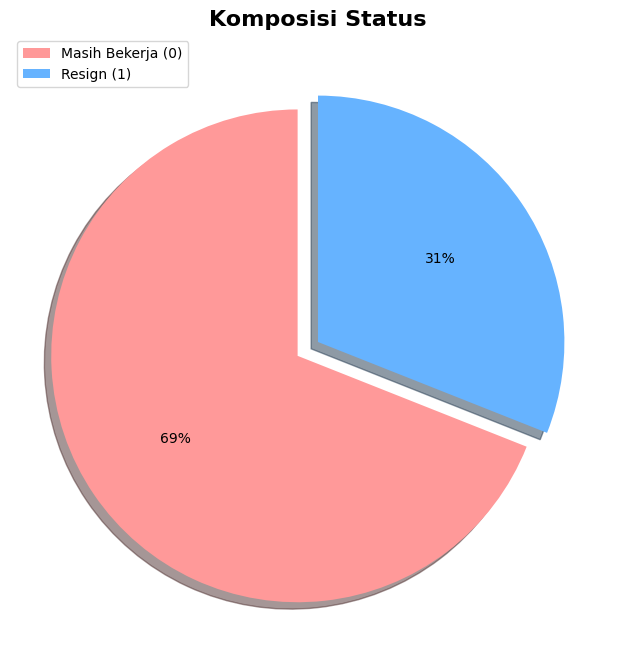

In [317]:
plt.figure(figsize=(8, 8))

# Data
target_counts = df_clean['Status'].value_counts()

# Mengatur variasi warna dan efek shadow
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)

# Pie chart
plt.pie(target_counts, autopct='%1.0f%%', startangle=90, explode=explode, colors=colors, shadow=True)

# Pengaturan lainnya
plt.title('Komposisi Status', fontsize=16, fontweight='bold')
plt.legend(labels=['Masih Bekerja (0)', 'Resign (1)'], loc='upper left')

plt.show()

Dataset ini memiliki kolom target yang imbalance dengan 69% bervalue masih bekerja dan 31% bervalue resign. Untuk mengatasi imbalance dataset ini, kita akan menggunakan teknik SMOTE (Synthetic Minority Oversampling Technique) untuk menyeimbangkan dataset ini.

In [318]:
#Filter dataframe dengan status masih bekerja
df_bekerja = df_clean[df_clean['Status']==0]
#Filter dataframe dengan status resign
df_resign = df_clean[df_clean['Status']==1]

#group by df bekerja kolom berdasarkan pekerjaan
jumlah_bekerja = df_bekerja.groupby('Pekerjaan')['Pekerjaan'].count().reset_index(name='Jumlah')

#group by df resign kolom berdasarkan pekerjaan
jumlah_resign = df_resign.groupby('Pekerjaan')['Pekerjaan'].count().reset_index(name='Jumlah')

#join tabel
table1 = pd.merge(jumlah_bekerja, jumlah_resign, on='Pekerjaan', how='outer')
table1 = table1.rename(columns={'Jumlah_x': 'Jumlah_bekerja', 'Jumlah_y': 'Jumlah_resign'})

#mengisi nilai yang kosong
table1.fillna(0, inplace=True)

In [319]:
table1

,Pekerjaan,Jumlah_bekerja,Jumlah_resign
0,Data Analyst,8,8.0
1,Data Engineer,7,3.0
2,DevOps Engineer,3,0.0
3,Digital Product Manager,2,0.0
4,Machine Learning Engineer,2,0.0
5,Product Design (UI & UX),15,9.0
6,Product Design (UX Researcher),1,0.0
7,Product Manager,11,6.0
8,Scrum Master,3,0.0
9,Software Architect,1,0.0


In [320]:
#menambahkan kolom total karyawan
table1['Total'] = table1['Jumlah_bekerja'] + table1['Jumlah_resign']

#menambahkan kolom presentse karyawan
table1['Presentase'] = table1['Jumlah_bekerja'] / table1['Total'] * 100

#mengurutkan berdasarkan presentase
table1 = table1.sort_values(by='Presentase', ascending=True)
table1

,Pekerjaan,Jumlah_bekerja,Jumlah_resign,Total,Presentase
0,Data Analyst,8,8.0,16.0,50.000000
12,Software Engineer (Front End),44,28.0,72.0,61.111111
5,Product Design (UI & UX),15,9.0,24.0,62.500000
7,Product Manager,11,6.0,17.0,64.705882
1,Data Engineer,7,3.0,10.0,70.000000
10,Software Engineer (Android),17,7.0,24.0,70.833333
11,Software Engineer (Back End),81,28.0,109.0,74.311927
2,DevOps Engineer,3,0.0,3.0,100.000000
3,Digital Product Manager,2,0.0,2.0,100.000000
4,Machine Learning Engineer,2,0.0,2.0,100.000000


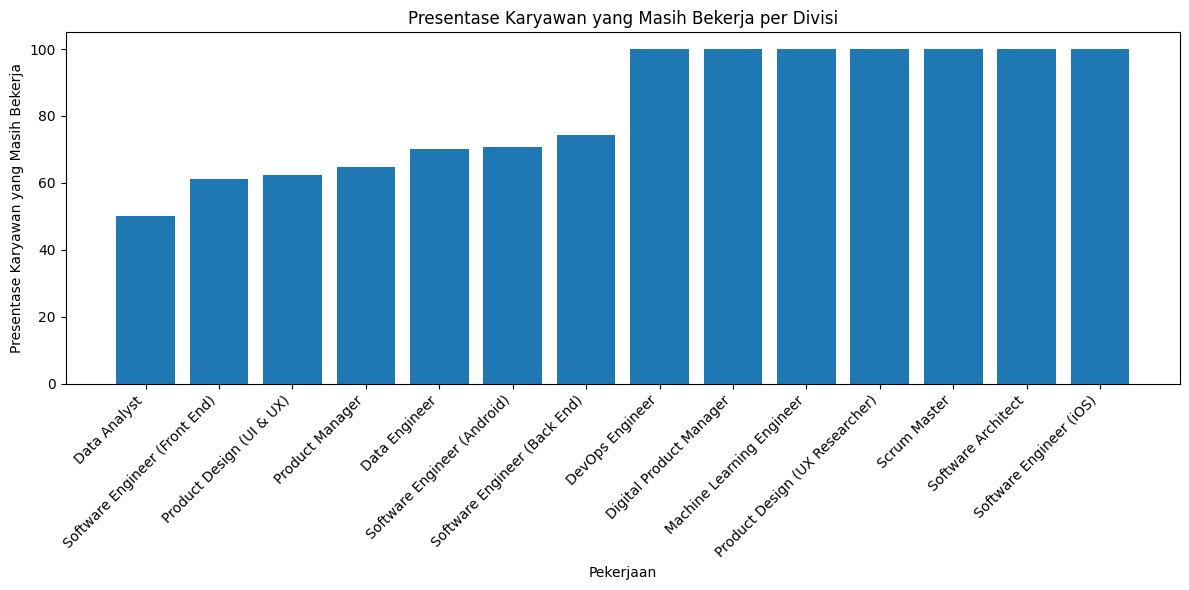

In [321]:
import matplotlib.pyplot as plt

#Membuat plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya
plt.figure(figsize=(12, 6))
plt.bar(table1['Pekerjaan'], table1['Presentase'])
plt.xlabel('Pekerjaan')
plt.ylabel('Presentase Karyawan yang Masih Bekerja')
plt.title('Presentase Karyawan yang Masih Bekerja per Divisi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Dapat terlihat bahwa data analsyt memiliki presentase penurunan pegawai paling tinggi dibandingkan devisi lainnya

In [322]:
data_analyst = df_resign[df_resign['Pekerjaan']=='Data Analyst'].groupby(['JenjangKarir', 'PerformancePegawai', 'AlasanResign'])['Pekerjaan'].count().reset_index(name='Jumlah')

data_analyst

,JenjangKarir,PerformancePegawai,AlasanResign,Jumlah
0,Freshgraduate_program,Bagus,toxic_culture,1
1,Freshgraduate_program,Biasa,internal_conflict,1
2,Freshgraduate_program,Biasa,toxic_culture,1
3,Freshgraduate_program,Sangat_bagus,internal_conflict,1
4,Freshgraduate_program,Sangat_bagus,toxic_culture,3
5,Freshgraduate_program,Sangat_kurang,toxic_culture,1


In [323]:
import plotly.express as px

fig = px.sunburst(data_analyst, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='Jumlah')
fig.show()

Berdasarkan grafik tersebut kita dapat melihat bahwa dalam divisi data analyst yang melakukan resign, semuanya berasal dari jenjang karir fresh graduates program. Dengan performa antara sangat kurang, biasa, bagus, dan sangat bagus. Alasan mereka melakukan resign terdiri dari dua alasan yaitu toxic culture dengan indeks paling tinggi (6 nilai) dan internal konflik (2 nilai).
Hal ini menunjukkan bahwa terdapat ketidaknyamanan dalam budaya kerja (toxic culture) dimana manajemen harus melakukan tindakan lebih lanjut untuk menanggulangi masalah ini, seperti identifikasi sumber masalah dengan survei atau feedback karyawan, mengevaluasi kepemimpinan, atau meningkatkan kesejahteraan karyawan.



#Predicton Using Machine Learning

In [324]:
df_clean.isnull().sum()

,0
Username,0
EnterpriseID,0
StatusPernikahan,0
JenisKelamin,0
StatusKepegawaian,0
Pekerjaan,0
JenjangKarir,0
PerformancePegawai,0
AsalDaerah,0
HiringPlatform,0


In [325]:
df_clean.duplicated().sum()

0

In [326]:
# Hapus kolom yang memiliki unique value terlalu banyak
df_clean.drop(columns=['Username', 'JenisKelamin', 'EnterpriseID', 'NomorHP', 'Email', 'PernahBekerja', 'TanggalLahir', 'TanggalHiring',
                       'TanggalPenilaianKaryawan', 'TahunResign', 'TanggalResign','TahunHiring'], axis = 1, inplace=True)

In [327]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   StatusPernikahan                    287 non-null    object 
 1   StatusKepegawaian                   287 non-null    object 
 2   Pekerjaan                           287 non-null    object 
 3   JenjangKarir                        287 non-null    object 
 4   PerformancePegawai                  287 non-null    object 
 5   AsalDaerah                          287 non-null    object 
 6   HiringPlatform                      287 non-null    object 
 7   SkorSurveyEngagement                287 non-null    int64  
 8   SkorKepuasanPegawai                 287 non-null    float64
 9   JumlahKeikutsertaanProjek           287 non-null    float64
 10  JumlahKeterlambatanSebulanTerakhir  287 non-null    float64
 11  JumlahKetidakhadiran                287 non-n

In [328]:
df_clean.head()

,StatusPernikahan,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,LamaBekerja,UsiaHired,Status
0,Belum_menikah,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,0,38,0
1,Belum_menikah,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,4,29,1
2,Menikah,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,3,37,1
3,Belum_menikah,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,0,34,0
4,Belum_menikah,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,4,39,1


In [329]:
#copy dataframe untuk encoding
df_encoded = df_clean.copy()

In [330]:
# Loop through each column
for column_name in df_encoded.columns:
    unique_values = df_encoded[column_name].unique()
    unique_values_str = ", ".join(map(str, unique_values))

    print(f"Unique values in '{column_name}' {df_encoded[column_name].dtype}:\n == {unique_values_str} == \n")

Unique values in 'StatusPernikahan' object:
 == Belum_menikah, Menikah, Bercerai, Lainnya, - == 

Unique values in 'StatusKepegawaian' object:
 == Outsource, FullTime, Internship == 

Unique values in 'Pekerjaan' object:
 == Software Engineer (Back End), Data Analyst, Software Engineer (Front End), Product Manager, Software Engineer (Android), Scrum Master, Product Design (UX Researcher), Product Design (UI & UX), Digital Product Manager, Data Engineer, Software Engineer (iOS), DevOps Engineer, Software Architect, Machine Learning Engineer == 

Unique values in 'JenjangKarir' object:
 == Freshgraduate_program, Senior_level, Mid_level == 

Unique values in 'PerformancePegawai' object:
 == Sangat_bagus, Sangat_kurang, Bagus, Biasa, Kurang == 

Unique values in 'AsalDaerah' object:
 == Jakarta Timur, Jakarta Utara, Jakarta Pusat, Jakarta Selatan, Jakarta Barat == 

Unique values in 'HiringPlatform' object:
 == Employee_Referral, Website, Indeed, LinkedIn, CareerBuilder, Diversity_Job_Fair

In [331]:
onehot = ['StatusKepegawaian', 'Pekerjaan', 'AsalDaerah', 'HiringPlatform', 'StatusPernikahan', 'AlasanResign']

# Label encoding
df_encoded['PerformancePegawai'] = df_encoded['PerformancePegawai'].map({'Sangat_kurang':  1, 'Kurang': 2, 'Biasa': 3, 'Bagus': 4, 'Sangat_bagus': 5})
df_encoded['TingkatPendidikan'] = df_encoded['TingkatPendidikan'].map({'Sarjana': 1, 'Magister': 2, 'Doktor': 3})
df_encoded['JenjangKarir'] = df_encoded['JenjangKarir'].map({'Freshgraduate_program': 1, 'Mid_level': 2, 'Senior_level': 3})


# One-hot encoding
for cats in onehot:
    onehots = pd.get_dummies(df_encoded[cats], prefix=cats)
    df_encoded = df_encoded.join(onehots)

df_encoded.drop(columns=onehot, axis=1, inplace=True)

In [332]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi objek scaler
scaler = MinMaxScaler()

# Melakukan normalisasi Min-Max pada fitur-fitur numerik
numeric_features = ['LamaBekerja', 'UsiaHired', 'SkorSurveyEngagement', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
                    'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran']
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

In [333]:
# Melakukan seleksi fitur dengan fungsi chi-squared dengan k=15
k = 15
selector = SelectKBest(score_func=chi2, k=k)

X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

X_new = selector.fit_transform(X, y)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]

print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['LamaBekerja', 'StatusKepegawaian_Internship', 'Pekerjaan_Data Analyst',
       'StatusPernikahan_-', 'AlasanResign_Lainnya', 'AlasanResign_apresiasi',
       'AlasanResign_ganti_karir', 'AlasanResign_internal_conflict',
       'AlasanResign_jam_kerja', 'AlasanResign_kejelasan_karir',
       'AlasanResign_leadership', 'AlasanResign_masih_bekerja',
       'AlasanResign_tidak_bahagia', 'AlasanResign_tidak_bisa_remote',
       'AlasanResign_toxic_culture'],
      dtype='object')


In [334]:
#plt.figure(figsize=(20, 20))
#sns.heatmap(df_encoded.corr(), cmap='Blues', annot=True, fmt='.2f')
#plt.show()

In [335]:
df_encoded.shape

(287, 58)

In [336]:
# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Split Details:")
print(f"Total Samples: {len(X)}")
print(f"Training Samples: {len(X_train)} ({len(X_train)/len(X)*100:.2f}%)")
print(f"Testing Samples: {len(X_test)} ({len(X_test)/len(X)*100:.2f}%)")

Data Split Details:
Total Samples: 287
Training Samples: 200 (69.69%)
Testing Samples: 87 (30.31%)


In [337]:
# Menangani data target yang imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_ro, y_train_ro = smote.fit_resample(X_train, y_train)

In [338]:
# Perform feature selection on the training data
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Create a list of models
models = [
    ("Support Vector Machine", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42))
]

# Membuat list untuk menyimpan hasil
results_list = []

# Train and evaluate all models with feature selection
for model_name, model in models:
    model.fit(X_train_selected, y_train)  # Train the model with selected features

    y_pred = model.predict(X_test_selected)  # Make predictions on the test data with selected features

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Membuat DataFrame dari hasil evaluasi
results = pd.DataFrame(results_list)

# Tampilkan tabel hasil evaluasi
print("\nHasil Evaluasi Model:")
results


Hasil Evaluasi Model:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Support Vector Machine,0.977011,1.0,0.93750,0.967742,0.968750
1,Gradient Boosting,1.000000,1.0,1.00000,1.000000,1.000000
2,Decision Tree,0.965517,1.0,0.90625,0.950820,0.953125
3,Random Forest,1.000000,1.0,1.00000,1.000000,1.000000
4,Logistic Regression,0.977011,1.0,0.93750,0.967742,0.968750


Dari berbagai model yang dijalankan, **Gradient Boosting** memiliki nilai Accuracy, Precision, Recall, F1, dan ROC yang paling baik.

# Menampilkan Hasil Untuk Gradient Boosting

In [339]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Membuat prediksi pada data test
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

print(f'confusion matrix: \n {conf_matrix}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC-AUC: {roc_auc:.2f}')

confusion matrix: 
 [[55  0]
 [ 0 32]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


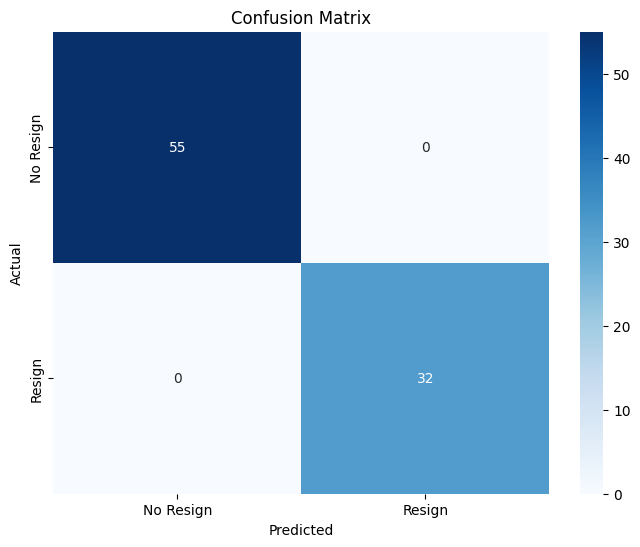

In [340]:
# Menghitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Resign', 'Resign'], yticklabels=['No Resign', 'Resign'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter

In [341]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [3, 6, 9],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9]
}

scoring = 'roc_auc'
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_roc_auc = grid_search.best_score_

print("Best Hyperparameters:")
print(best_params)
print(f"Best Mean ROC-AUC: {best_roc_auc:.2f}")

Best Hyperparameters:
{'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100, 'subsample': 0.9}
Best Mean ROC-AUC: 0.99


# Evaluasi dengan Cross-Validation

In [342]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import make_scorer, roc_auc_score

model = GradientBoostingClassifier()
scoring = {
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': make_scorer(roc_auc_score)
}

# Membagi data dengan 10 fold
cv_results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

# Menghitung mean dan standard deviiasi dari skor precision, recall, dan ROC-AUC
precision_mean = cv_results['test_precision'].mean()
precision_std = cv_results['test_precision'].std()
recall_mean = cv_results['test_recall'].mean()
recall_std = cv_results['test_recall'].std()
roc_auc_mean = cv_results['test_roc_auc'].mean()
roc_auc_std = cv_results['test_roc_auc'].std()

print(f'Mean Precision: {precision_mean:.2f} (±{precision_std:.2f})')
print(f'Mean Recall: {recall_mean:.2f} (±{recall_std:.2f})')
print(f'Mean ROC-AUC: {roc_auc_mean:.2f} (±{roc_auc_std:.2f}')

Mean Precision: 0.99 (±0.04)
Mean Recall: 0.91 (±0.16)
Mean ROC-AUC: 0.95 (±0.08


Hasil ini menunjukkan bahwa model tersebut menunjukkan skor Precison dan Recall yang kuat, yang menunjukkan kemampuannya untuk mengklasifikasikan kasus positif dengan benar sekaligus meminimalkan positif palsu dan negatif palsu. Selain itu, skor ROC-AUC yang tinggi mencerminkan kemampuan diskriminasi model secara keseluruhan yang sangat baik.

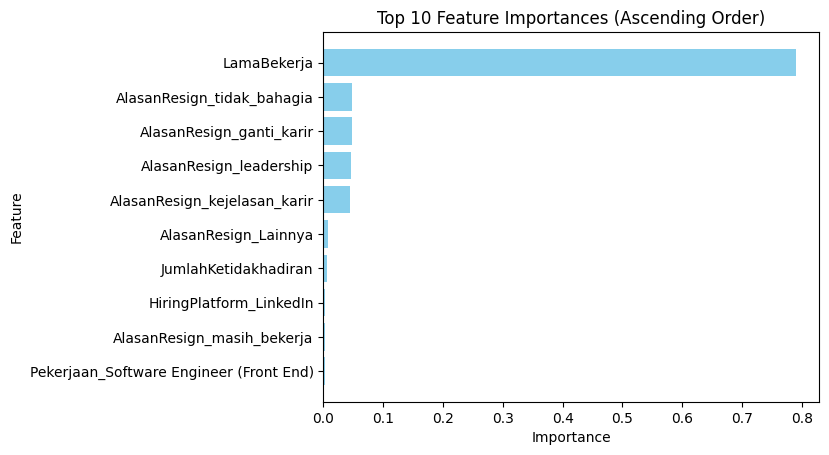

In [343]:
# Train your GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in ascending order
sorted_feature_df = feature_df.sort_values(by='Importance', ascending=True)

# Plot the top 10 feature importances in a bar chart
top_features = sorted_feature_df.tail(10)  # Get the top 10 features
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Ascending Order)')
plt.show()

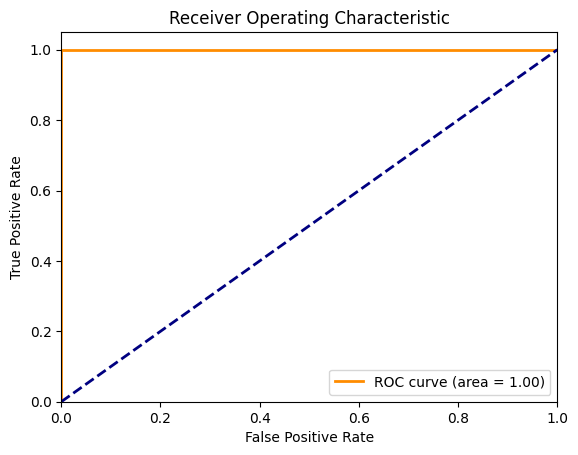

In [344]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:,1])

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


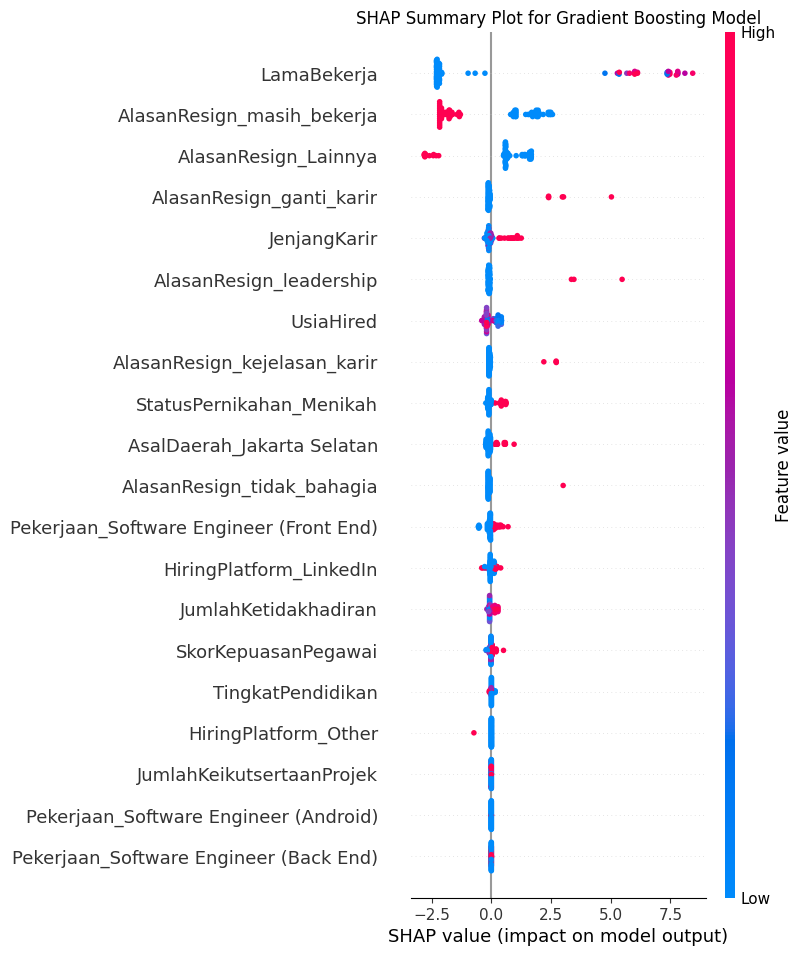

In [346]:
!pip install shap
import shap

# Train your Gradient Boosting model (replace with your model)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Initialize a SHAP explainer
explainer = shap.Explainer(gb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot for Gradient Boosting Model')
plt.show()

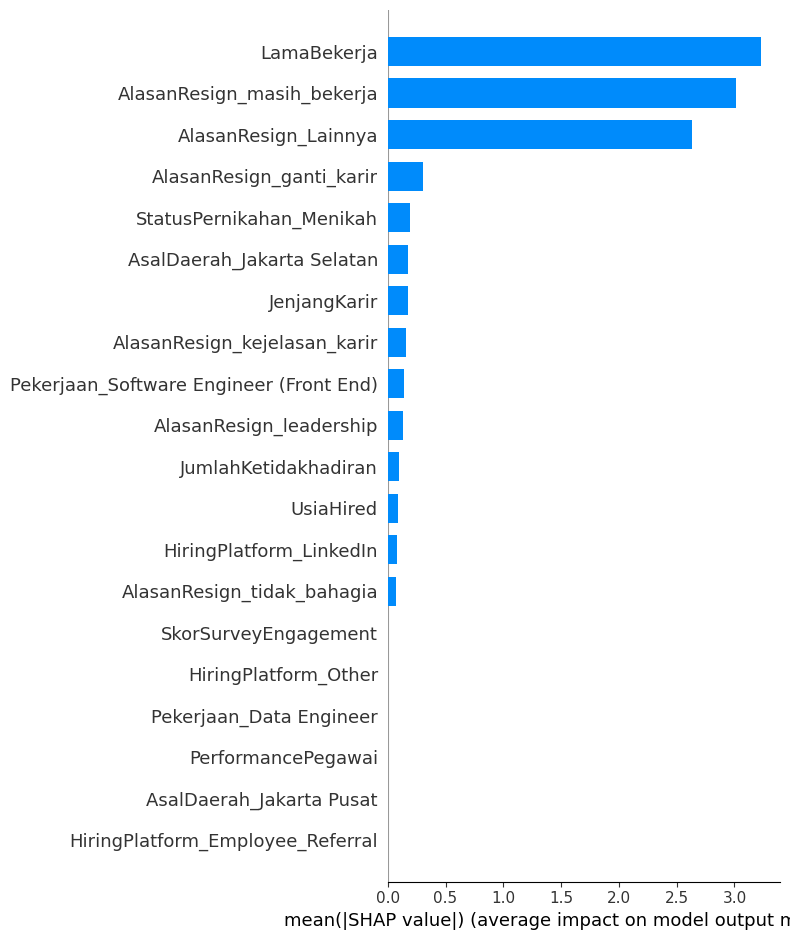

In [345]:
import shap
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

explainer = shap.Explainer(gb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")